# LAB 11

### Try SVM classifier on MNIST dataset, compare the preformance of linear, polynomial and RBF kernels.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv("/home/nihar/Desktop/SEM 7/ML/Lab/Lab11/train.csv") #reading the csv files using pandas
test_data = pd.read_csv("/home/nihar/Desktop/SEM 7/ML/Lab/Lab11/test.csv")

In [4]:
train_data.shape

(42000, 785)

In [5]:
test_data.shape

(28000, 784)

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
order = list(np.sort(train_data['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

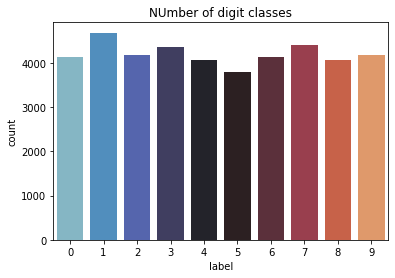

In [8]:
## Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
g = sns.countplot( train_data["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
train_data.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

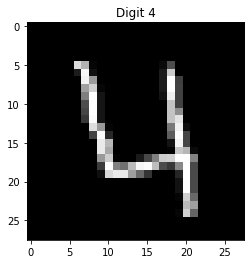

In [9]:
four = train_data.iloc[3, 1:]
four.shape
four = four.values.reshape(28,28)
plt.imshow(four, cmap='gray')
plt.title("Digit 4")

In [10]:
y = train_data['label']
## Dropping the variable 'label' from X variable
X = train_data.drop(columns = 'label')
## Printing the size of data
print(train_data.shape)

(42000, 785)


In [11]:
## Normalization
X = X/255.0
test_data = test_data/255.0
print("X:", X.shape)
print("test_data:", test_data.shape)

X: (42000, 784)
test_data: (28000, 784)


In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, train_size = 0.2 ,random_state = 129)

In [13]:
# linear model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
# predict
y_pred_linear = model_linear.predict(X_test)

In [14]:
from sklearn import metrics
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_linear), "\n")

accuracy: 0.9115873015873016 



In [15]:
#RBF model
rbf_model = SVC(kernel='rbf')
# fit
rbf_model.fit(X_train, y_train)
# predict
y_pred_rbf = rbf_model.predict(X_test)

In [16]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rbf), "\n")

accuracy: 0.9597619047619048 



In [17]:
#Polinomial model
polinomial_model = SVC(kernel='poly')
# fit
polinomial_model.fit(X_train, y_train)
# predict
y_pred_poli = polinomial_model.predict(X_test)

In [18]:
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_poli), "\n")


accuracy: 0.9515079365079365 



### From above result we can say that rbf is better than polinomial and linear 
### RBF > Poli > Linear